In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
number_of_samples = 2500000

In [73]:
data_attack = pd.read_csv('/content/drive/MyDrive/dataset_attack.csv', nrows = number_of_samples)

In [74]:
data_normal = pd.read_csv('/content/drive/MyDrive/dataset_normal.csv', nrows = number_of_samples)

In [75]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [76]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [77]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [78]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [79]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [80]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(X)


In [81]:
x.shape

(5000000, 25)

In [82]:
X=np.reshape(x, (100000, 1250))

In [83]:
X.shape

(100000, 1250)

In [84]:
for i in range(0,len(Y)):
  if Y[i]=="attack":
    Y[i]=1
  else:
    Y[i]=0

In [85]:
my_array = np.array(Y)

In [86]:
my_array.shape

(5000000,)

In [87]:
y_n=np.reshape(my_array, (100000,50))

In [88]:
y_n.shape

(100000, 50)

In [89]:
import numpy as np
l_n = y_n.tolist()

In [90]:
len(l_n)

100000

In [91]:
y_ll=[]
for i in range(0,len(l_n)):
  s=sum(l_n[i])
  if s>25:
    y_ll.append(1)
  else:
    y_ll.append(0)

In [92]:
y_all = np.array(y_ll)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_all, test_size = 0.20)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 1250)
(20000, 1250)
(80000,)
(20000,)


In [95]:
X_train=np.reshape(X_train, (80000, 25, 50))
X_test =np.reshape(X_test, (20000, 25, 50))
Y_train=np.reshape(Y_train, (80000,1))
Y_test =np.reshape(Y_test, (20000,1))

In [115]:
def create_baseline():
    model = Sequential()
    model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(25, 50)))
    model.add(LSTM(16, activation='relu'))
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
    
    return model

In [116]:
model = create_baseline()

In [117]:
history=model.fit(X_train, Y_train, epochs=30,validation_data=(X_test, Y_test))

Epoch 1/30
2500/2500 [==============================] - 47s 18ms/step - loss: 0.0457 - accuracy: 0.9431 - val_loss: 0.0264 - val_accuracy: 0.9664
Epoch 2/30
2500/2500 [==============================] - 48s 19ms/step - loss: 0.0213 - accuracy: 0.9740 - val_loss: 0.0191 - val_accuracy: 0.9770
Epoch 3/30
2500/2500 [==============================] - 46s 18ms/step - loss: 0.0166 - accuracy: 0.9800 - val_loss: 0.0185 - val_accuracy: 0.9777
Epoch 4/30
2500/2500 [==============================] - 47s 19ms/step - loss: 0.0135 - accuracy: 0.9837 - val_loss: 0.0135 - val_accuracy: 0.9836
Epoch 5/30
2500/2500 [==============================] - 46s 18ms/step - loss: 0.0120 - accuracy: 0.9859 - val_loss: 0.0117 - val_accuracy: 0.9861
Epoch 6/30
2500/2500 [==============================] - 45s 18ms/step - loss: 0.0109 - accuracy: 0.9870 - val_loss: 0.0113 - val_accuracy: 0.9859
Epoch 7/30
2500/2500 [==============================] - 44s 18ms/step - loss: 0.0104 - accuracy: 0.9878 - val_loss: 0.0128 -

In [118]:
test_loss,test_accuracy=model.evaluate(X_test,Y_test)

625/625 [==============================] - 4s 7ms/step - loss: 0.0080 - accuracy: 0.9902


In [119]:
model.save('/content/drive/MyDrive/dataset_attack/module7.tl')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset_attack/module7.tl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset_attack/module7.tl/assets


In [120]:
predict = model.predict(X_test, verbose=1)

625/625 [==============================] - 5s 7ms/step


In [121]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if int(predictn[i])==1 and int(Y_testn[i][0])==1:
    tp+=1
  elif int(predictn[i])==0 and int(Y_testn[i][0])==0:
    tn+=1
  elif int(predictn[i])==0 and int(Y_testn[i][0])==1:
    fp+=1
  elif int(predictn[i])==1 and int(Y_testn[i][0])==0:
    fn+=1

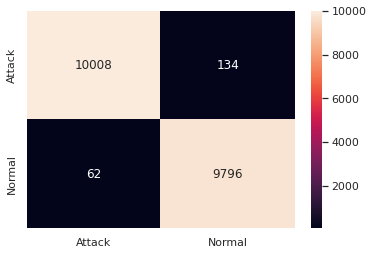

In [122]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [123]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.02%


In [124]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


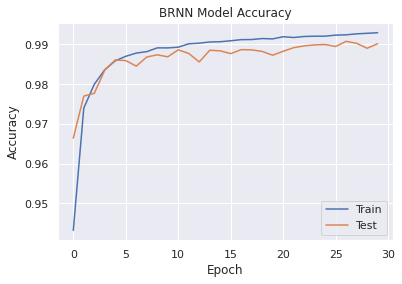

In [125]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()

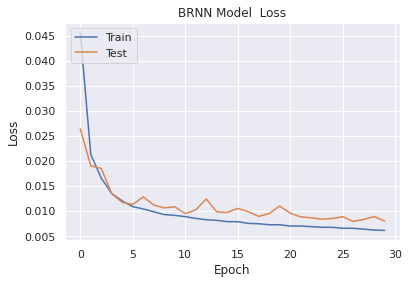

In [126]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()